(array([0., 1.]), array([4, 9]))
1.0
[0.]


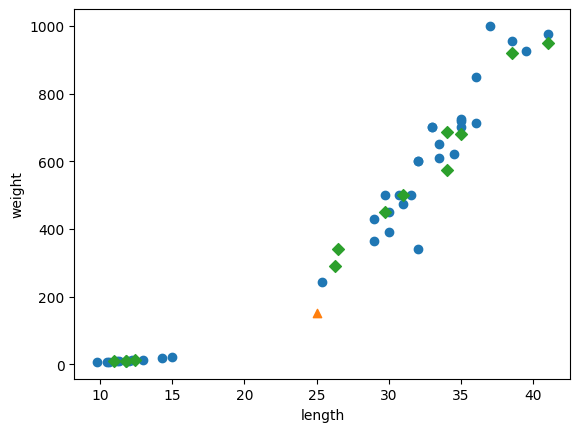

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

import numpy as np


#a=np.column_stack(([1,2,3],[4,5,6],[7,8,9]))

fisth_data = np.column_stack((fish_length, fish_weight))



fish_target = np.concatenate((np.ones(35), np.zeros(14)))
from sklearn.model_selection import train_test_split as split
train_input, test_input, train_target, test_target = split(fisth_data, fish_target, stratify=fish_target, random_state=42)

print(np.unique(test_target, return_counts=True))
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
print(kn.score(test_input, test_target))
print(kn.predict([[25,150]]))
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(test_input[:,0], test_input[:,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

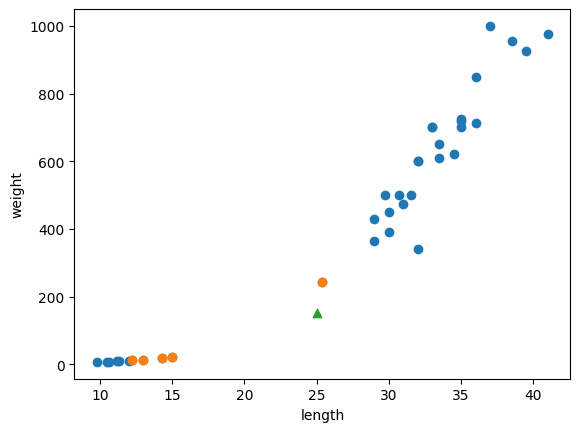

[0.]
[[1. 0. 0. 0. 0.]]


In [ ]:
distance,indexes=kn.kneighbors([[25,150]])
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(train_input[indexes,0], train_input[indexes,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.scatter(25,150, marker='^')
plt.show()
print(kn.predict([[25,150]]))
print(train_target[indexes])

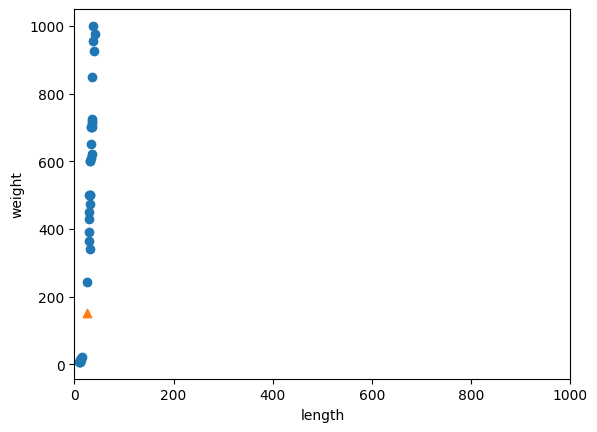

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.xlim(0,1000)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

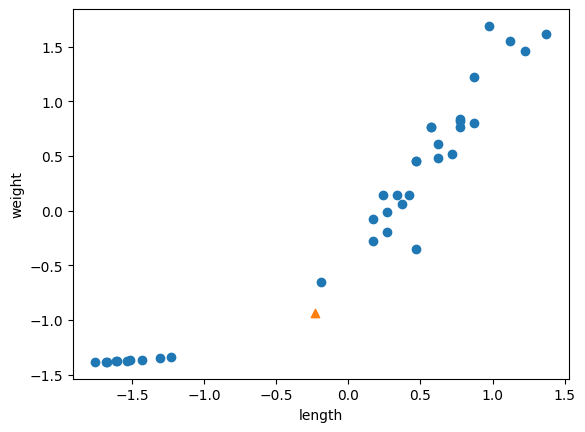

In [ ]:
import numpy as np
mean=np.mean(train_input, axis=0)
std=np.std(train_input, axis=0)
#print(mean[0],mean[1])
#print(std[0],std[1])
train_scaled = (train_input - mean) / std
import matplotlib.pyplot as plt
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter((25-mean[0])/std[0],(150-mean[1])/std[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[1.]


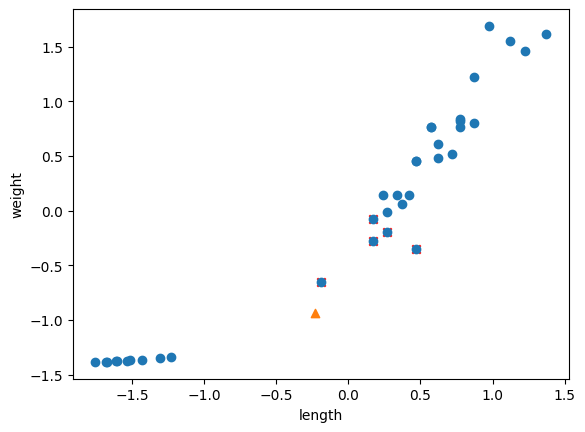

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)
test_input_scaled = (test_input - mean) / std
kn.score(test_input_scaled, test_target)
new = ([25,150] - mean) / std
print(kn.predict([new]))
distance,indexes=kn.kneighbors([new])
import matplotlib.pyplot as plt
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1],marker='x',color='red')
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [ ]:
a=[1,2,3]
b=[4,5,6]
c=[7,8,9]
zip_list= [ [w,s,l]for w,s,l in zip(a,b,c)]
print(zip_list)

[[1, 4, 7], [2, 5, 8], [3, 6, 9]]


/home/hyuksu/projects/ml/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/hyuksu/projects/ml/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/hyuksu/projects/ml/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/hyuksu/projects/ml/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/hyuksu

✅ Training complete. Weight update tracking done.


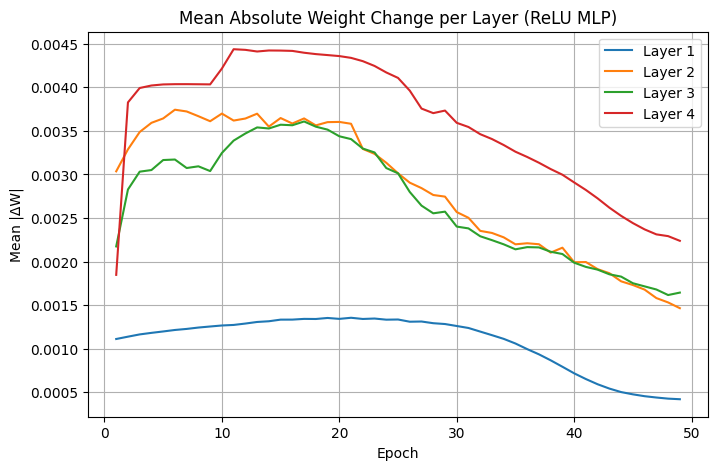

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier

# 1️⃣ Titanic dataset
titanic = fetch_openml(name="titanic", version=1, as_frame=True)
df = titanic.frame.copy()

# Target / features
y = df["survived"].astype(int)
X = df.drop(columns=["survived"])

# Numerical / categorical columns
num_cols = X.select_dtypes(include=["number"]).columns
cat_cols = X.select_dtypes(exclude=["number"]).columns

# 2️⃣ 전처리 (결측치 + 표준화 + 원핫)
num_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())
])
cat_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# 3️⃣ 전처리 후 numpy 배열로 변환
X_tr_prep = preprocess.fit_transform(X_tr)
X_te_prep = preprocess.transform(X_te)

# 4️⃣ MLP 정의 (hidden layer 3개)
mlp = MLPClassifier(hidden_layer_sizes=(32, 16, 8),
                    activation='relu',
                    solver='adam',
                    max_iter=1,
                    warm_start=True,
                    random_state=42)

# 5️⃣ 반복 학습: 매 epoch마다 가중치 변화 추적
epochs = 50
weight_means = {i: [] for i in range(len(mlp.hidden_layer_sizes) + 1)}  # layer별 mean abs weights

prev_weights = None

for epoch in range(epochs):
    mlp.fit(X_tr_prep, y_tr)

    # 각 layer의 weight matrix 접근
    current_weights = mlp.coefs_
    if prev_weights is not None:
        for i, (prev, curr) in enumerate(zip(prev_weights, current_weights)):
            diff = np.mean(np.abs(curr - prev))  # 평균 절대 변화량
            weight_means[i].append(diff)
    prev_weights = [w.copy() for w in current_weights]

print("✅ Training complete. Weight update tracking done.")

# 6️⃣ 시각화
plt.figure(figsize=(8,5))
for layer, values in weight_means.items():
    if values:  # 첫 epoch에는 변화가 없으므로 skip
        plt.plot(range(1, len(values)+1), values, label=f"Layer {layer+1}")
plt.title("Mean Absolute Weight Change per Layer (ReLU MLP)")
plt.xlabel("Epoch")
plt.ylabel("Mean |ΔW|")
plt.legend()
plt.grid(True)
plt.show()



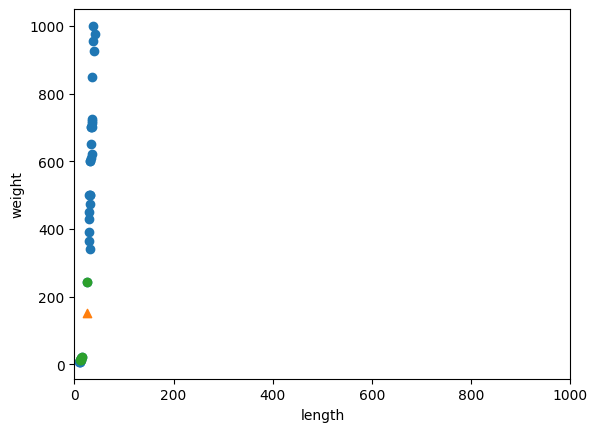

In [6]:
import numpy as np
import matplotlib.pyplot as plt
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
fisth_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
from sklearn.model_selection import train_test_split as split
train_input, test_input, train_target, test_target = split(fisth_data, fish_target, stratify=fish_target, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)
plt.xlim(0,1000)
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')



distance,indexes=kn.kneighbors([[25,150]])
plt.scatter(train_input[indexes,0], train_input[indexes,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


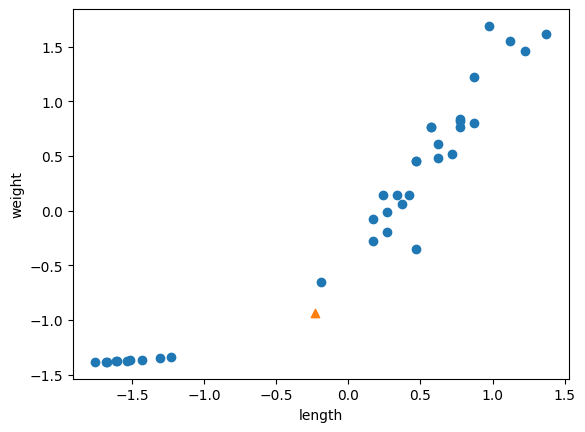

1.0


In [9]:
mean=np.mean(train_input, axis=0)
std=np.std(train_input, axis=0)
train_scaled = (train_input - mean) / std

import matplotlib.pyplot as plt
plt.scatter(train_scaled[:,0], train_scaled[:,1])
new=([25,150] - mean) / std
plt.scatter(new[0],new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as split
kn = KNeighborsClassifier()
test_mean=np.mean(test_input, axis=0)
test_std=np.std(test_input, axis=0)
test_scaled = (test_input - mean) / std
kn.fit(train_scaled, train_target)
a=kn.score(test_scaled, test_target)
print(a)


    # TODO: Define form fields here
